This notebook is for the analysis of experiments in which some flies were interacting with balls that were blocked using magnets. After a certain amount of time, magnets were removed and we want to compare how well they push balls compared to controls.

# Required packages 


In [1]:
import sys
import os
from icecream import ic

from pathlib import Path

import utils_behavior

from utils_behavior import Ballpushing_utils
from utils_behavior import Utils
from utils_behavior import Processing
from utils_behavior import HoloviewsTemplates
from utils_behavior import Seaborn_Templates
from utils_behavior import Sleap_utils


import pandas as pd
import hvplot.pandas
import numpy as np

from scipy import stats
from statsmodels.stats.multitest import multipletests

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import iqplot

import importlib

import holoviews as hv
import bokeh.io
import colorcet

bokeh.io.output_notebook()

hv.extension("bokeh")

Loading BokehJS ...

In [2]:
# Select the experiments to analyze

Let's start with one that is representative of the best settings I had, which was using magnets under the backlighting sheet, keeping control flies in their chambers until the first half-hour of pretraining was finished.
These were done on **240530 and 240531**

In [3]:
# Get the data path
Datapath = Utils.get_data_path()

# Get all folders with "TNT_Fine" in the name

Folders = [
    f
    for f in os.listdir(Datapath)
    if "240530" in f or "240531" in f and os.path.isdir(Datapath / f)
]

Folders

['240530_MagnetBlock_Videos_Tracked', '240531_MagnetBlock_Videos_Tracked']

In [21]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [5]:
# Generate Experiment objects from each folder

Experiments = [Ballpushing_utils.Experiment(Datapath / f, experiment_type = "MagnetBlock") for f in Folders]

Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena2/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena2/corridor1
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena2/corridor4
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena2/corridor2
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena2/corridor6
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena2/corridor3
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena7/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlock_Videos_Tracked/arena7/corridor1
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240530_MagnetBlo

In [7]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [8]:
# Build the position

magnet_data_summary = Ballpushing_utils.Dataset(Experiments, dataset_type="summary")

print(magnet_data_summary)

Dataset with 102 flies and 2 experiments
keyword: MagnetBlock


In [ ]:
Magnet_summary_dataset = magnet_data_summary.data

Magnet_summary_dataset

In [9]:
magnet_data_summary.data.columns

Index(['index', 'nb_events', 'max_event', 'max_event_time', 'max_distance',
       'final_event', 'final_event_time', 'nb_significant_events',
       'significant_ratio', 'first_significant_event',
       'first_significant_event_time', 'aha_moment', 'aha_moment_time',
       'insight_effect', 'cumulated_breaks_duration', 'pushed', 'pulled',
       'pulling_ratio', 'success_direction', 'interaction_proportion',
       'distance_moved', 'exit_time', 'fly', 'flypath', 'experiment',
       'Nickname', 'Brain region', 'Date', 'Genotype', 'Period',
       'FeedingState', 'Orientation', 'Light', 'Crossing', 'BallType',
       'Magnet', 'Blocked'],
      dtype='object')

In [11]:
metrics_to_plot = ['nb_events', 'max_event', 'max_event_time', 'max_distance',
       'final_event', 'final_event_time', 'nb_significant_events',
       'significant_ratio', 'first_significant_event',
       'first_significant_event_time', 'aha_moment', 'aha_moment_time',
       'insight_effect', 'cumulated_breaks_duration', 'pushed', 'pulled',
       'pulling_ratio', 'success_direction', 'interaction_proportion',
       'distance_moved']

In [15]:
importlib.reload(Seaborn_Templates)

<module 'utils_behavior.Seaborn_Templates' from '/home/durrieu/utils_behavior/utils_behavior/Seaborn_Templates.py'>

In [ ]:
for metric in metrics_to_plot:
    try:
        Seaborn_Templates.sns_plot(magnet_data_summary.data, metric=metric, kdims="Magnet", colorby="Magnet", plot_type="jitterboxplot")
        
    except:
        print(f"Error with {metric}")
        
        



In [ ]:
start = 30 * 60

magnet_data.generate_dataset("summary", time_range=[start])

In [ ]:
# Get sample size : get how many unique fly ids we have grouped by Magnet

magnet_data.data.groupby("Magnet")["fly"].nunique()

# Create a "label" column that is "Magnet block" if Magnet is y, and "Control" if Magnet is n. Add the sample size to the label.

magnet_data.data["label"] = magnet_data.data["Magnet"].apply(
    lambda x: "Magnet block (n = 59)" if x == "y" else "Control (n = 48)"
)


In [ ]:
# Get the data columns

data_columns = magnet_data.data.columns

data_columns

# Do some plotting

Now we're gonna plot some metrics and compare them between Magnet y and magnet n.

In [ ]:
importlib.reload(HoloviewsTemplates)

In [ ]:
Plot = HoloviewsTemplates.jitter_boxplot(
    data=magnet_data.data,
    metric ="TimeToFinish",
    kdims = "label",
    metadata=magnet_data.metadata,
    plot_options=HoloviewsTemplates.hv_slides,
    colorby="Genotype",
)

In [ ]:
Plot = Plot.opts(
    ylabel = "Time to bring the ball to the end (s)",
    ylim = (0, 3800)
)

In [ ]:
Plot
# + Histogram distribution

## Make and save all metrics plots

In [ ]:
savepath = Utils.get_labserver() / "Experimental_data/MultiMazeRecorder/Plots/MagnetBlock/240617"

In [ ]:
hv.save(Plot, savepath / "TimeToFinish_byGenotype.html")

In [ ]:
# Also get the png
hv.save(Plot, savepath / "TimeToFinish_byGenotype.png", fmt="png")

In [ ]:
# Do the same with NumberEvents

Plot = HoloviewsTemplates.jitter_boxplot(
    data=magnet_data.data,
    metric="NumberEvents",
    kdims="label",
    metadata=magnet_data.metadata,
    plot_options=HoloviewsTemplates.hv_slides,
    colorby="Genotype",
)

Plot = Plot.opts(
    ylabel = "Number of events",
)

hv.save(Plot, savepath / "NumberEvents_byGenotype.html")

In [ ]:
# Generate the list of metrics

metrics = [
    "NumberEvents",
    "FinalEvent",
    "FinalTime",
    "SignificantEvents",
    "SignificantFirst",
    "SignificantFirstTime",
    "Pushes",
    "Pulls",
    "PullingRatio",
    "InteractionProportion",
    "AhaMoment",
    "AhaMomentIndex",
    "InsightEffect",
    "TimeToFinish",
    "SignificantRatio",
]

In [ ]:
# For each metric, generate a jitter boxplot and save it

for metric in metrics: 
    Plot = HoloviewsTemplates.jitter_boxplot(
        magnet_data.data, metric, "Magnet", magnet_data.metadata, scale_max=[True if metric == "FinalTime" else False]
    )
    hv.save(Plot, savepath / f"{metric}.html")

In [ ]:
# Make a nice layout with all the plots:
plots = []

for metric in metrics:
    Plot = HoloviewsTemplates.jitter_boxplot(
        magnet_data.data,
        metric,
        "Magnet",
        magnet_data.metadata,
        scale_max=[True if metric in ["FinalTime", "SignificantRatio"] else False],
    )
    plots.append(Plot)

layout = hv.Layout(plots).cols(2)

In [ ]:
hv.save(layout, savepath / "All_metrics.html")

In [ ]:
importlib.reload(HoloviewsTemplates)

# Distribution

We can see that there seems to be some distribution variability between groups, which would be better highlighted by using something like an histogram

In [ ]:
Hist = HoloviewsTemplates.histograms(magnet_data.data, "TimeToFinish", "label", bins = 20, xlabel = "Time to bring the ball to the end (s)", plot_options=HoloviewsTemplates.hv_slides, orientation = "horizontal")

In [ ]:
Hist

In [ ]:
hv.save(Hist, savepath / "TimeToFinish_histogram.png")

# Heatmaps

Let's look at the ball position over time grouped by Magnet condition

In [ ]:
importlib.reload(Ballpushing_utils)

In [ ]:
start = 30 * 60

In [ ]:
position = magnet_data.generate_dataset(metrics = "coordinates", time_range=[start])

## Sanity checks

> The dataset should be 3600 seconds long. So 3600 * 29 rows.

In [ ]:
position.head()

In [ ]:
# Get the data columns

data_columns = position.columns

data_columns

In [ ]:
import holoviews as hv
from holoviews import opts
from holoviews.plotting.util import process_cmap
from bokeh.palettes import Viridis256
from bokeh.models import FixedTicker
import dask.dataframe as dd

# Convert the DataFrame to a Dask DataFrame
ddf = dd.from_pandas(position, npartitions=4)  # Use a suitable number of partitions

# Convert 'Magnet' and 'time' to categorical data type
ddf["Magnet"] = ddf["Magnet"].astype("category")
ddf["time"] = ddf["time"].astype("category")

# Ensure that the categories of 'time' are known
ddf["time"] = ddf["time"].cat.as_known()

# Define custom colormap
cmap = process_cmap("Viridis256_r", provider="bokeh")

# Get unique genotypes
Genotypes = ddf["Magnet"].unique().compute()


# Define a function that removes y-axis ticks
def remove_yticks(plot, element):
    plot.handles["yaxis"].ticker = FixedTicker(ticks=[])


# Pivot the DataFrame once
df_pivot = ddf.categorize(["Magnet", "time"]).pivot_table(
    index="fly", columns="time", values="yball_relative", aggfunc="first"
)

for genotype in Genotypes:
    # Slice the pivoted DataFrame for the current genotype
    df_genotype = df_pivot.loc[ddf[ddf["Magnet"] == genotype]["fly"].unique()]

    # Create a HeatMap
    heatmap = hv.HeatMap((df_genotype.columns, df_genotype.index, df_genotype.values))

    # Apply options to the HeatMap
    heatmap.opts(
        opts.HeatMap(
            cmap=cmap,
            colorbar=True,
            tools=["hover"],
            width=900,
            height=900,
            title=genotype,
            xlabel="Time(s)",
            ylabel="",
            fontscale=1.5,
        )
    )

    # Save each plot as a separate file in SVG format
    hv.save(heatmap, f"{savepath}/heatmap_{genotype}.svg", fmt="svg")

In [ ]:
Plotlist[0]

In [ ]:
# Create a layout with all the plots
layout = hv.Layout(Plotlist).cols(2)

layout

In [ ]:
# Save the layout
hv.save(layout, savepath / "Heatmaps.html")

# New protocol

Here I'm gonna replicate the analysis with a new protocol where control flies get to explore part of the corridor and have a transparent gate to see the ball and so the gate lifting doesn't provide a clear cue that they can push now.

In [29]:
importlib.reload(Ballpushing_utils)


<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [2]:
# Get the data path
Datapath = Utils.get_data_path()

# Get all folders with "TNT_Fine" in the name

Folders = [
    f
    for f in os.listdir(Datapath)
    if "240710" in f or "240711" in f and os.path.isdir(Datapath / f)
]

Folders

['240711_MagnetBlock_Videos_Tracked', '240710_MagnetBlock_Videos_Tracked']

In [38]:
savepath = Utils.get_labserver() / "Experimental_data/MultiMazeRecorder/Plots/MagnetBlock/241212"

In [3]:

# Generate Experiment objects from each folder

Experiments = [Ballpushing_utils.Experiment(Datapath / f, experiment_type="MagnetBlock") for f in Folders]

Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena2/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena2/corridor1
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena2/corridor4
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena2/corridor2
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena2/corridor6
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena2/corridor3
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena7/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlock_Videos_Tracked/arena7/corridor1
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240711_MagnetBlo

In [42]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [43]:
magnet_data_coords = Ballpushing_utils.Dataset(Experiments, dataset_type="coordinates").data

In [44]:
magnet_data_coords.head()

,index,time,frame,adjusted_time,x_fly_0,y_fly_0,distance_fly_0,x_ball_0,y_ball_0,distance_ball_0,...,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,BallType,Magnet
0,104399,3600.0,104400,NaN,0.000000,0.000000,0.000000,-7.852631,-181.952403,0.000000,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
1,104689,3610.0,104690,NaN,7.476585,30.204167,31.115768,-7.814710,-181.969259,0.041498,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
2,104979,3620.0,104980,NaN,-1.243320,-9.654911,9.734636,-7.856649,-181.952874,0.004045,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
3,105269,3630.0,105270,NaN,-5.414801,8.817246,10.347169,-7.835323,-181.927785,0.030093,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
4,105559,3640.0,105560,NaN,0.847578,5.096821,5.166815,-7.839648,-181.922985,0.032156,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n


In [46]:
# Rename the Magnet values to "Magnet block" and "Control" 

magnet_data_coords["label"] = magnet_data_coords["Magnet"].apply(lambda x: "Magnet block" if x == "y" else "Control")

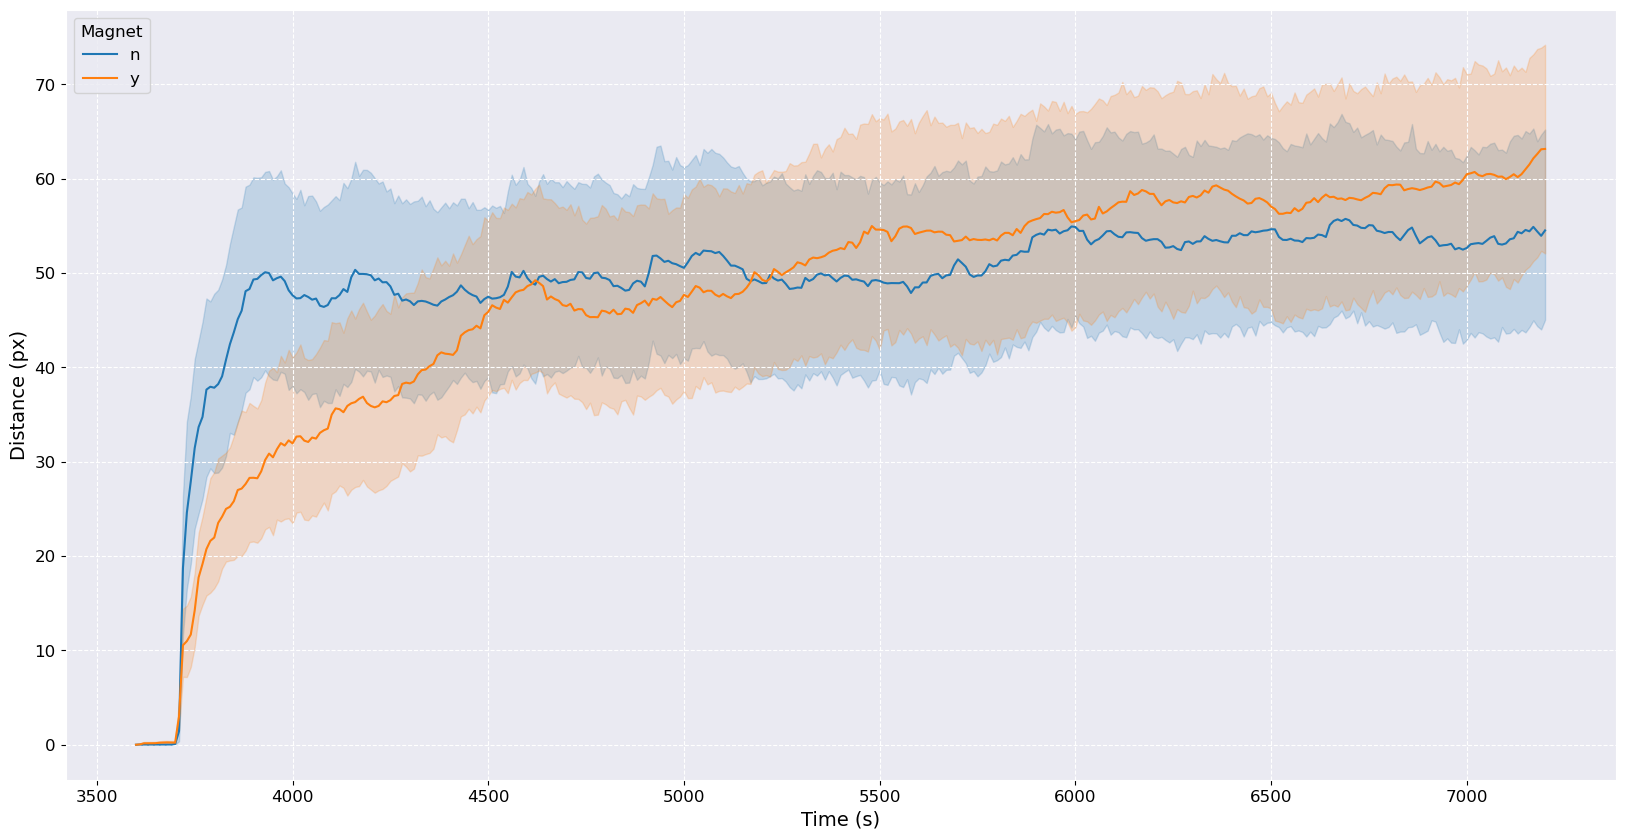

In [47]:
# Plot the average ball displacement grouped by Magnet

Lineplot = sns.lineplot(data=magnet_data_coords, x="time", y="distance_ball_0", hue="Magnet")

# Customize x, y and legend labels

Lineplot.set(xlabel="Time (s)", ylabel="Distance (px)", title="")

plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/MagnetBlock/241212Average_ball_displacement.png")

plt.show()


In [49]:
importlib.reload(Ballpushing_utils)
importlib.reload(Sleap_utils)

<module 'utils_behavior.Sleap_utils' from '/home/durrieu/utils_behavior/utils_behavior/Sleap_utils.py'>

In [4]:
# Build the position

magnet_data_summary = Ballpushing_utils.Dataset(Experiments, dataset_type="summary").data

euclidean_distance for ball_0: 0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
104401    8.125676
104402    8.115392
104403    8.105107
104404    8.094823
104405    8.084539
Name: euclidean_distance, Length: 104406, dtype: float64
euclidean_distance for ball_0: 0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
104401    8.125676
104402    8.115392
104403    8.105107
104404    8.094823
104405    8.084539
Name: euclidean_distance, Length: 104406, dtype: float64
euclidean_distance for ball_0: 0         0.000000
1         0.000551
2         0.000814
3         0.007328
4         0.001336
            ...   
104401    7.332975
104402    7.332858
104403    7.332740
104404    7.332622
104405    7.332504
Name: euclidean_distance, Length: 104406, dtype: float64
euclidean_distance for ball_0: 0         0.000000
1         0.000551
2         0.000814
3         0.007328
4 

In [5]:
magnet_data_summary

,index,nb_events,max_event,max_event_time,max_distance,final_event,final_event_time,nb_significant_events,significant_ratio,first_significant_event,...,Brain region,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing,BallType,Magnet
0,fly_0_ball_0,22.0,1.0,134.655172,25.365101,NaN,NaN,4.0,0.181818,0.0,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
1,fly_0_ball_0,14.0,4.0,193.793103,40.092351,NaN,NaN,7.0,0.500000,0.0,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
2,fly_0_ball_0,70.0,19.0,1023.000000,72.803022,NaN,NaN,10.0,0.142857,5.0,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
3,fly_0_ball_0,105.0,0.0,113.793103,122.193162,0.0,113.793103,7.0,0.066667,0.0,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
4,fly_0_ball_0,87.0,0.0,169.931034,124.373638,0.0,169.931034,20.0,0.229885,0.0,...,Control,240711,PR,AM10,starved_noWater,std,on,1,steel,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,fly_0_ball_0,53.0,42.0,2525.275862,104.386895,44.0,2850.172414,6.0,0.113208,7.0,...,Control,240710,PR,AM10,starved_noWater,std,on,1,steel,n
101,fly_0_ball_0,86.0,27.0,1109.103448,92.917407,NaN,NaN,16.0,0.186047,0.0,...,Control,240710,PR,AM10,starved_noWater,std,on,1,steel,n
102,fly_0_ball_0,56.0,0.0,127.206897,19.623559,NaN,NaN,2.0,0.035714,0.0,...,Control,240710,PR,AM10,starved_noWater,std,on,1,steel,n
103,fly_0_ball_0,27.0,26.0,3173.448276,108.764404,26.0,3173.448276,6.0,0.222222,2.0,...,Control,240710,PR,AM10,starved_noWater,std,on,1,steel,n


In [6]:
# Get the data columns
magnet_data_summary.columns

Index(['index', 'nb_events', 'max_event', 'max_event_time', 'max_distance',
       'final_event', 'final_event_time', 'nb_significant_events',
       'significant_ratio', 'first_significant_event',
       'first_significant_event_time', 'aha_moment', 'aha_moment_time',
       'insight_effect', 'cumulated_breaks_duration', 'pushed', 'pulled',
       'pulling_ratio', 'success_direction', 'interaction_proportion',
       'distance_moved', 'exit_time', 'fly', 'flypath', 'experiment',
       'Nickname', 'Brain region', 'Date', 'Genotype', 'Period',
       'FeedingState', 'Orientation', 'Light', 'Crossing', 'BallType',
       'Magnet'],
      dtype='object')

In [7]:
metrics_to_plot = ['nb_events', 'max_event', 'max_event_time', 'max_distance',
       'final_event', 'final_event_time', 'nb_significant_events',
       'significant_ratio', 'first_significant_event',
       'first_significant_event_time', 'aha_moment', 'aha_moment_time',
       'insight_effect', 'cumulated_breaks_duration', 'pushed', 'pulled',
       'pulling_ratio', 'success_direction', 'interaction_proportion',
       'distance_moved']

In [19]:
metrics_to_exclude = ["final_event", "final_event_time"]

In [9]:
# Rename the Magnet values to "Magnet block" and "Control" 

magnet_data_summary["label"] = magnet_data_summary["Magnet"].apply(lambda x: "Magnet block" if x == "y" else "Control")

In [17]:
importlib.reload(Seaborn_Templates)

<module 'utils_behavior.Seaborn_Templates' from '/home/durrieu/utils_behavior/utils_behavior/Seaborn_Templates.py'>

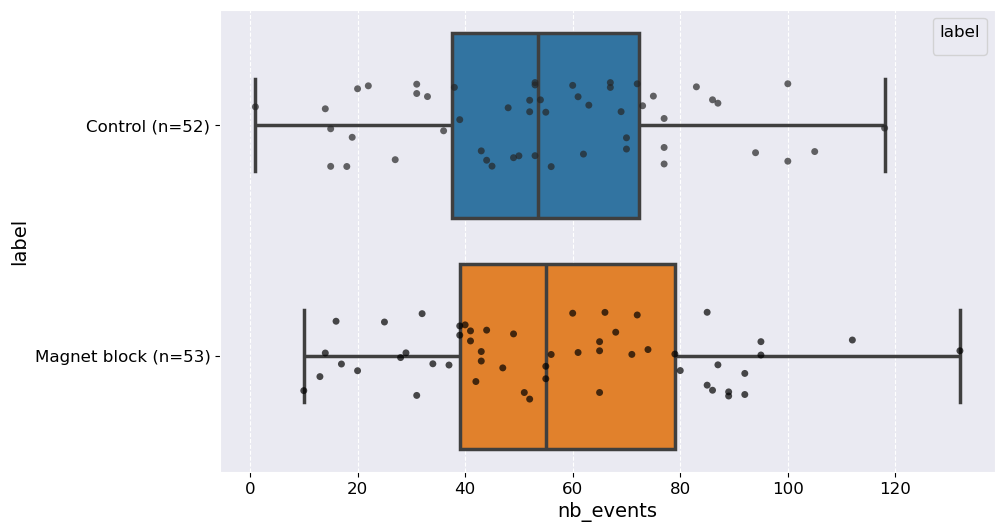

nb_events: t-statistic = -0.2647333093131036, p-value = 0.7917439558857078, Cohen's d = -0.051685696996962335, CI = [-11.797592184736839, 9.018927453241911]


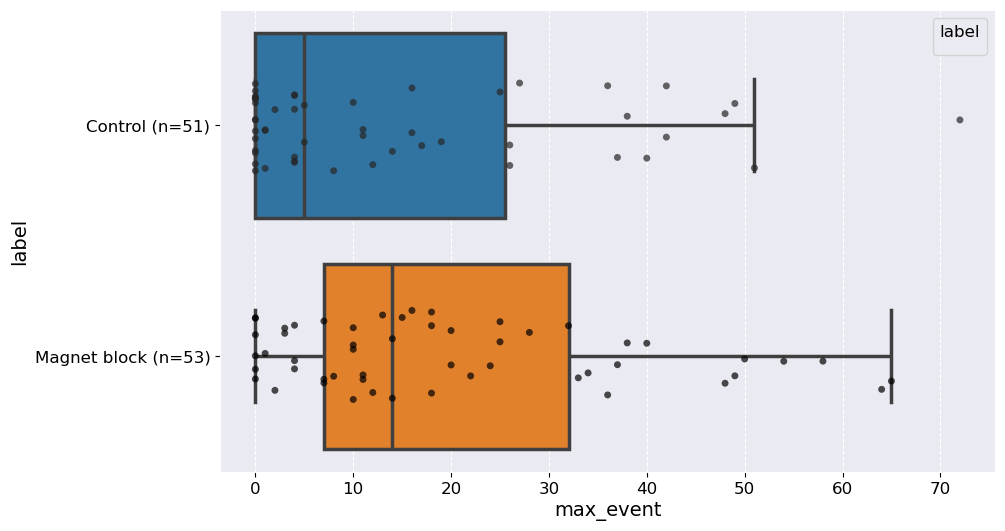

max_event: t-statistic = -1.5609390834573698, p-value = 0.12163554363510803, Cohen's d = -0.3062045054073217, CI = [-12.480064388370574, 1.4878335337645847]


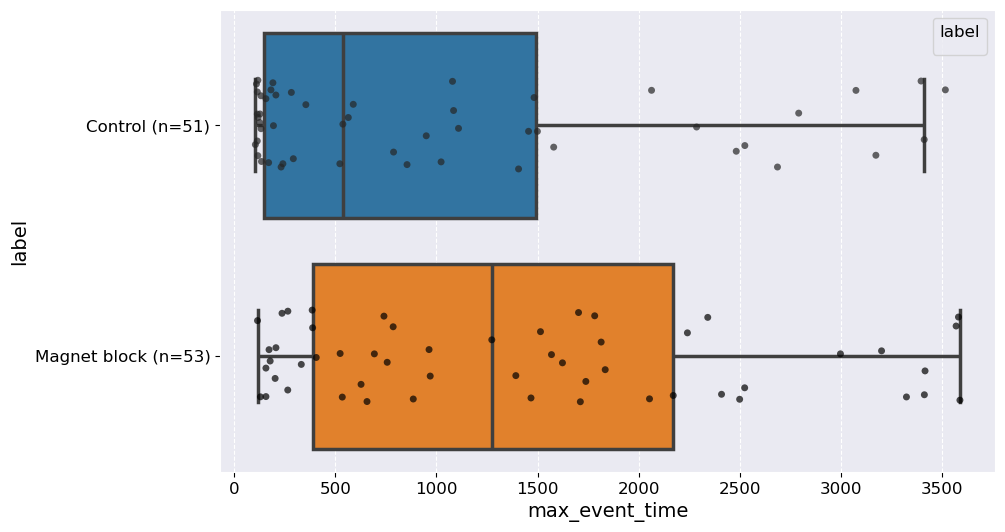

max_event_time: t-statistic = -1.7894460572081963, p-value = 0.07651076539059054, Cohen's d = -0.351083225785301, CI = [-813.7782869357312, 41.85409032149653]


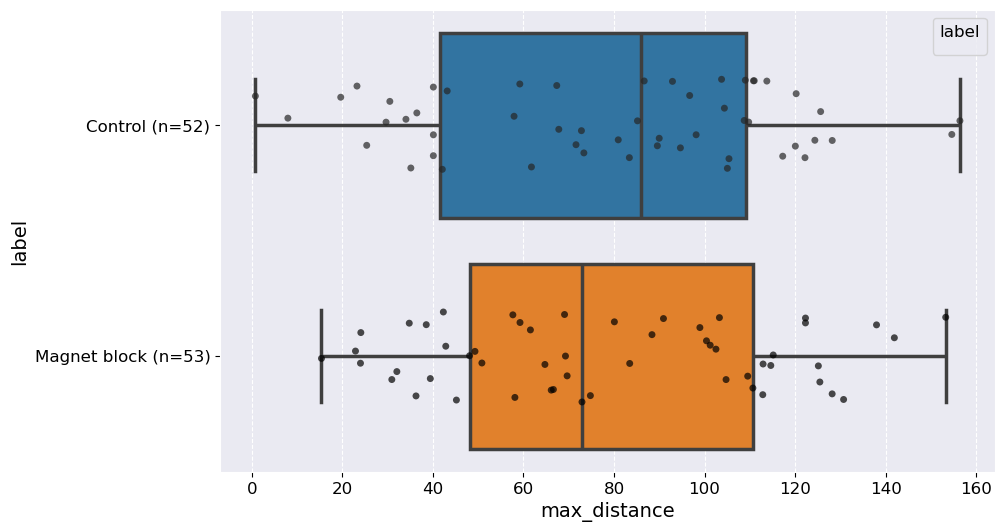

max_distance: t-statistic = 0.06312107536960207, p-value = 0.9497924250954902, Cohen's d = 0.012317824122815036, CI = [-14.06504771130654, 14.989771447613926]


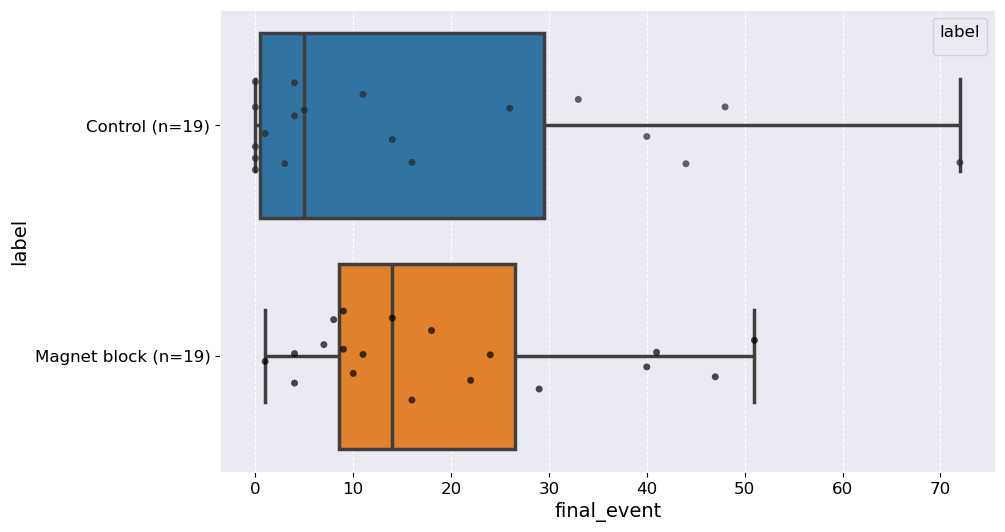

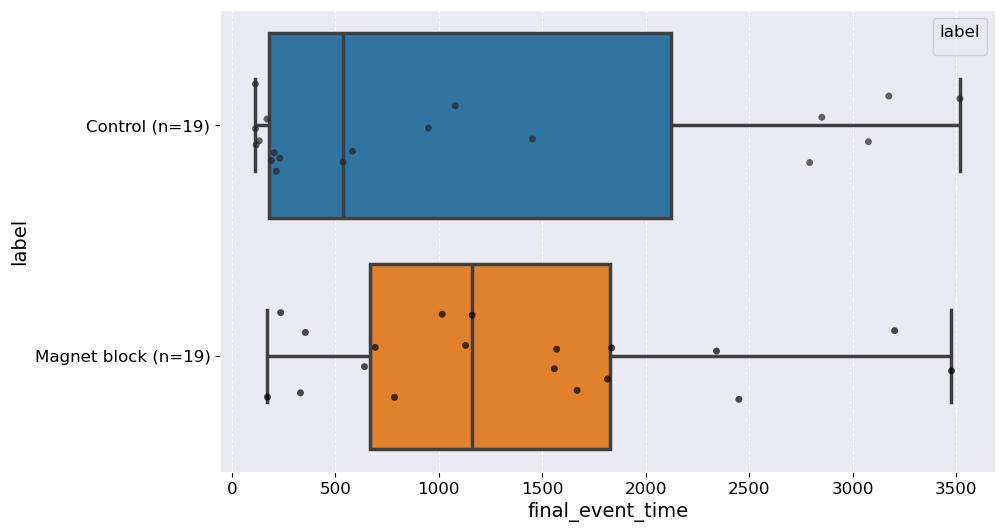

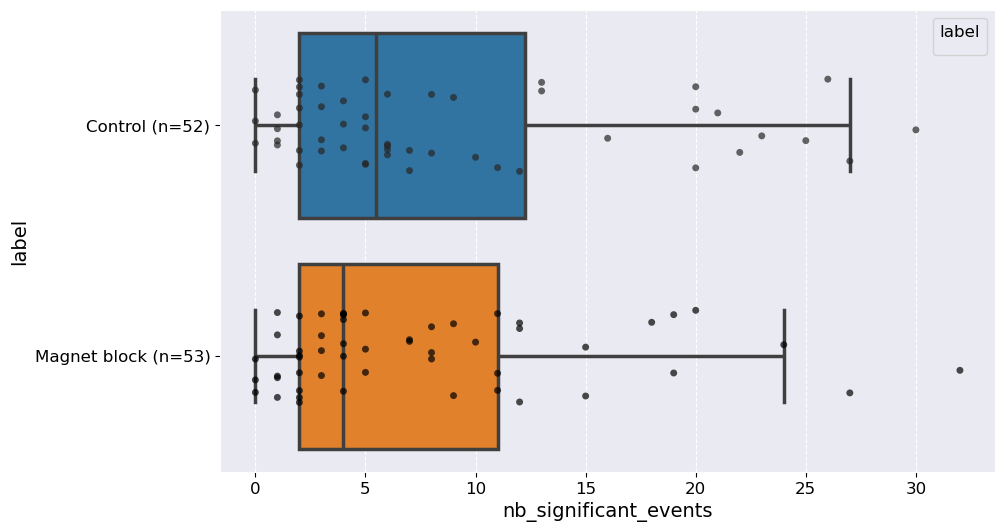

nb_significant_events: t-statistic = 0.6632381616944011, p-value = 0.5086596885236947, Cohen's d = 0.12938560001652744, CI = [-2.011217129340289, 4.032262122083396]


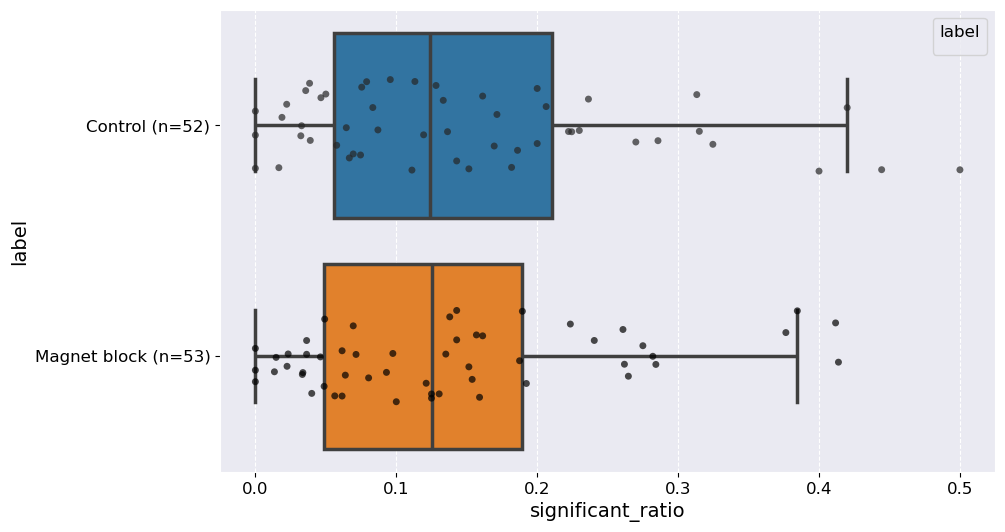

significant_ratio: t-statistic = 0.5714388439097888, p-value = 0.5689470689105864, Cohen's d = 0.11148381355361725, CI = [-0.032139971049676454, 0.05815739387035449]


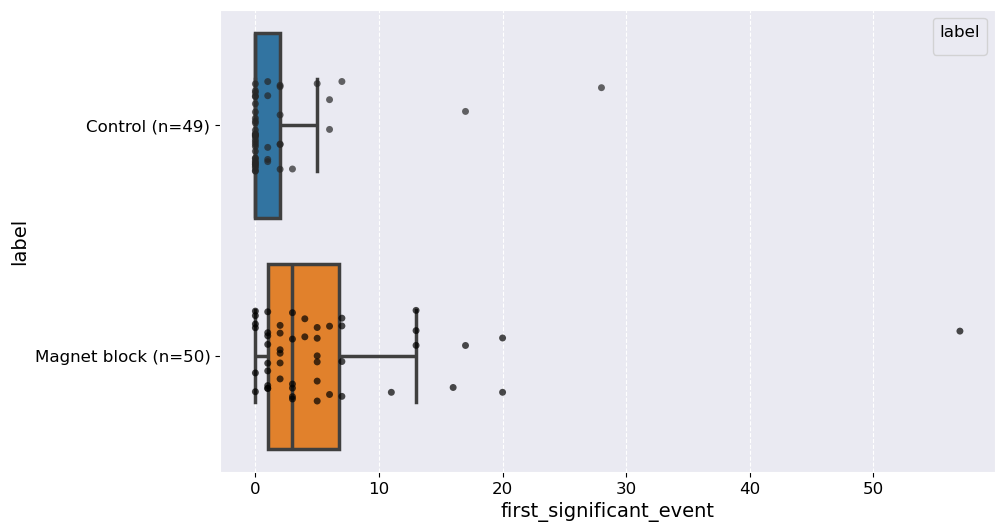

first_significant_event: t-statistic = -2.8318455803674674, p-value = 0.005628006303887248, Cohen's d = -0.5708999124032985, CI = [-7.013785275991543, -1.2335616627839685]


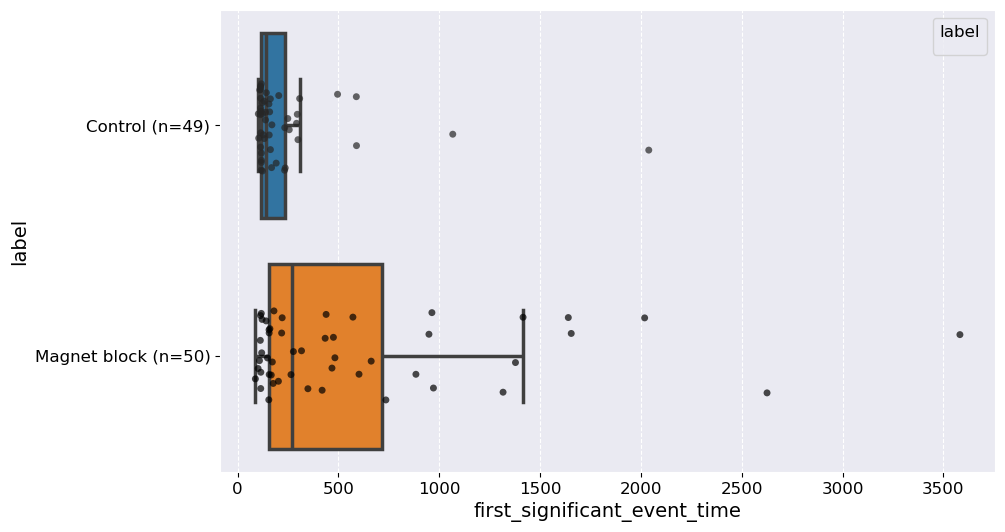

first_significant_event_time: t-statistic = -3.1247367637280523, p-value = 0.0023475254420465886, Cohen's d = -0.6303224373399233, CI = [-567.3185943815918, -126.5791114593653]


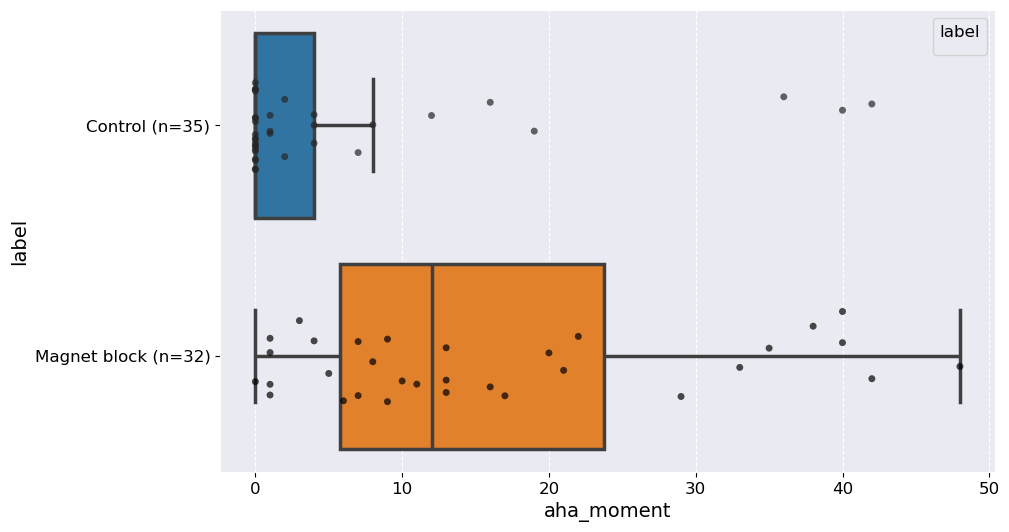

aha_moment: t-statistic = -3.3817318461023356, p-value = 0.0012233171978501807, Cohen's d = -0.8229533566173981, CI = [-16.952315723071397, -4.3637557055000284]


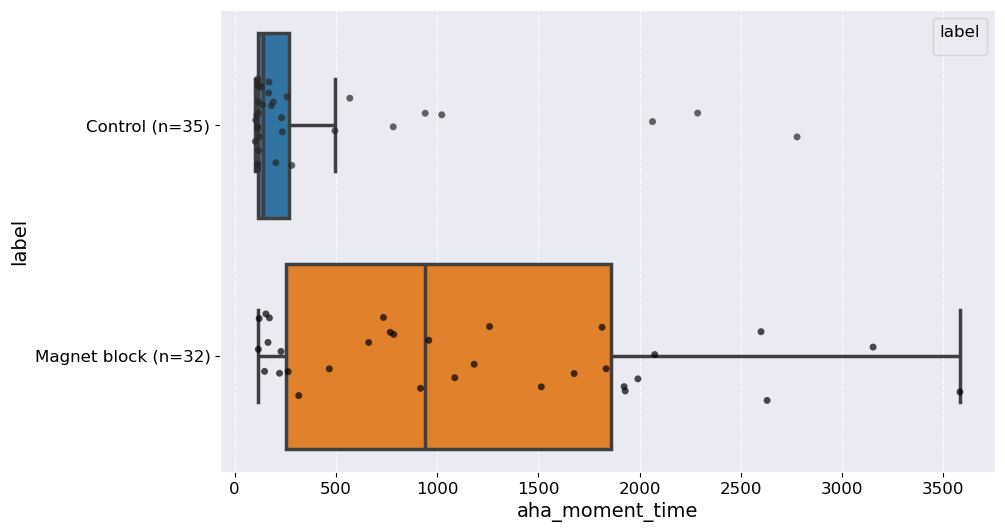

aha_moment_time: t-statistic = -3.718655393808103, p-value = 0.0004195449759025673, Cohen's d = -0.9017697736453167, CI = [-1142.063153796257, -343.97354571113243]


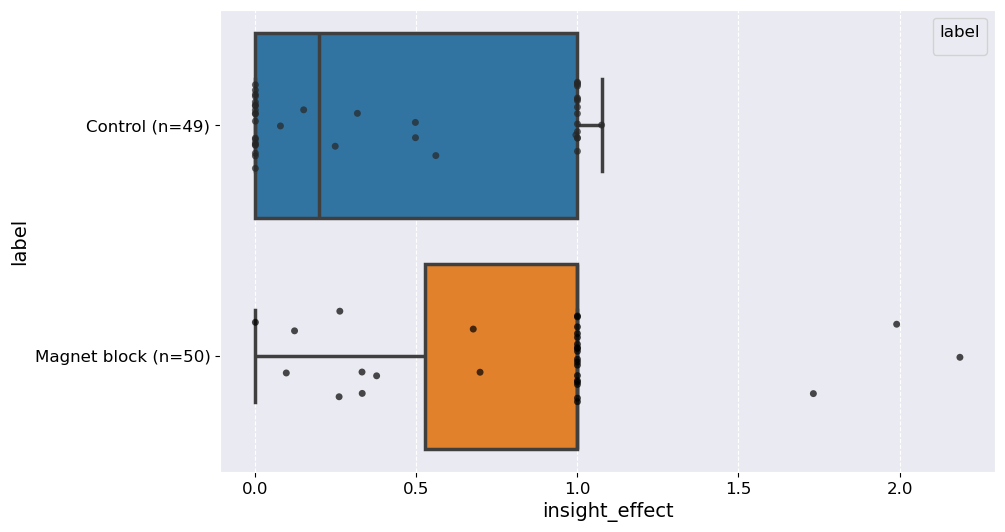

insight_effect: t-statistic = nan, p-value = nan, Cohen's d = nan, CI = [nan, nan]


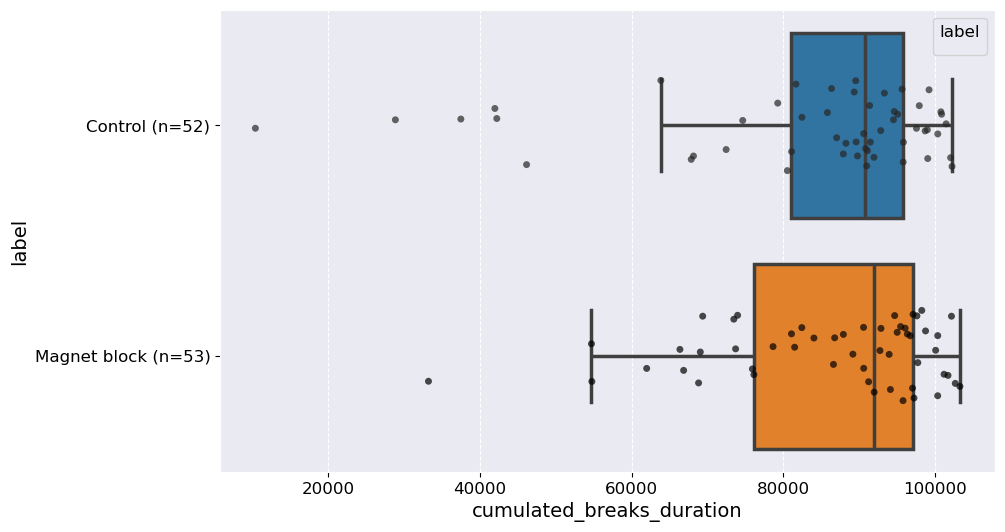

cumulated_breaks_duration: t-statistic = -0.804658711092524, p-value = 0.4228701009990681, Cohen's d = -0.15682824341414447, CI = [-9727.873844345895, 4112.4972115447545]


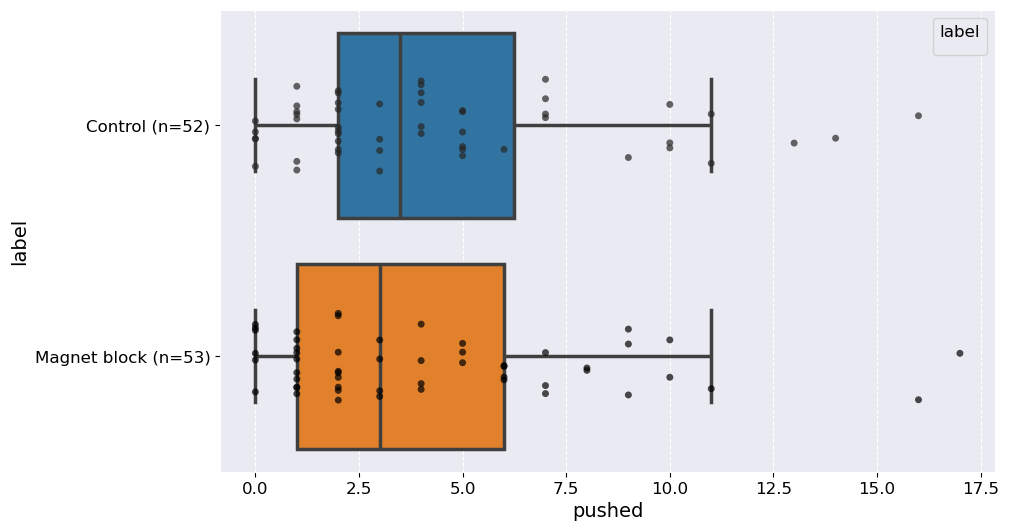

pushed: t-statistic = 0.3061627660616004, p-value = 0.7600987086112224, Cohen's d = 0.05976256744601157, CI = [-1.2859734741604716, 1.7554945191532156]


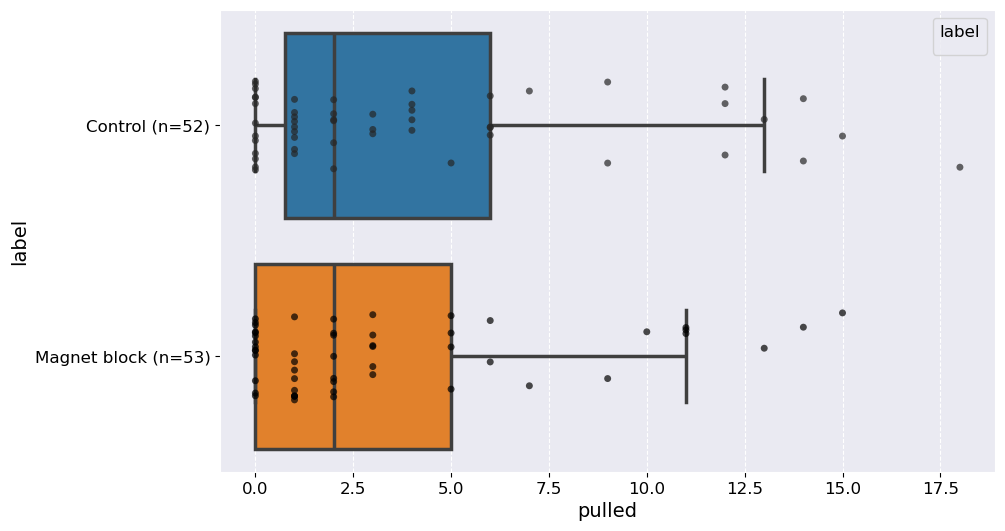

pulled: t-statistic = 0.8927911240907603, p-value = 0.37405019122143834, Cohen's d = 0.1741216264163164, CI = [-0.9475312647115757, 2.499055212461938]


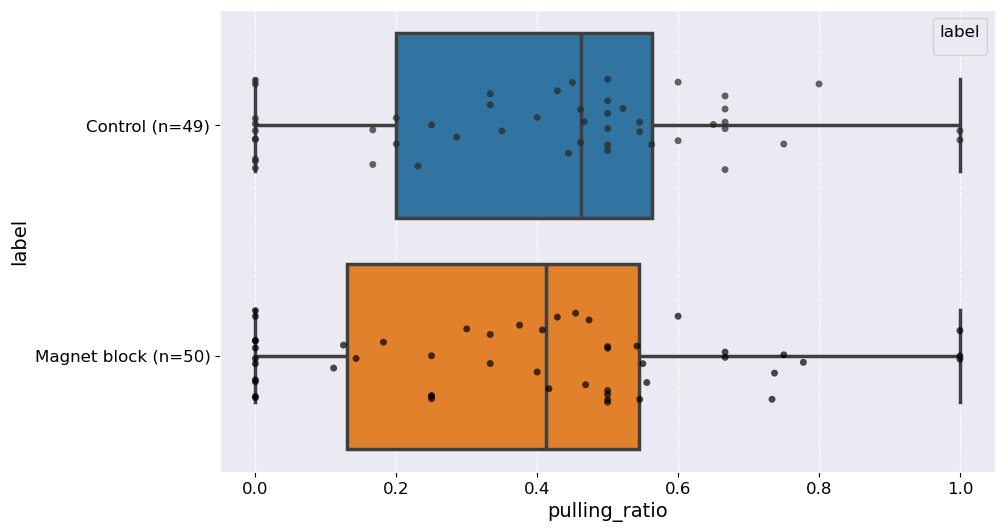

pulling_ratio: t-statistic = 0.306531842042327, p-value = 0.7598567519315612, Cohen's d = 0.06163666322019261, CI = [-0.09421115875359827, 0.12862763949304862]
Error with success_direction: cannot access local variable 'boxprops' where it is not associated with a value


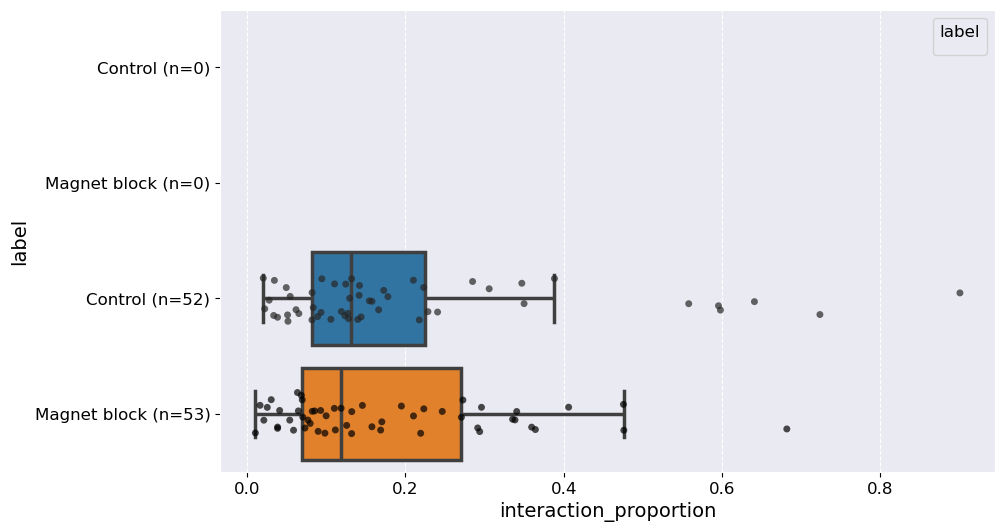

interaction_proportion: t-statistic = 0.8046587110925271, p-value = 0.4228701009990663, Cohen's d = 0.15682824341414509, CI = [-0.03938947198000821, 0.09317351344123816]


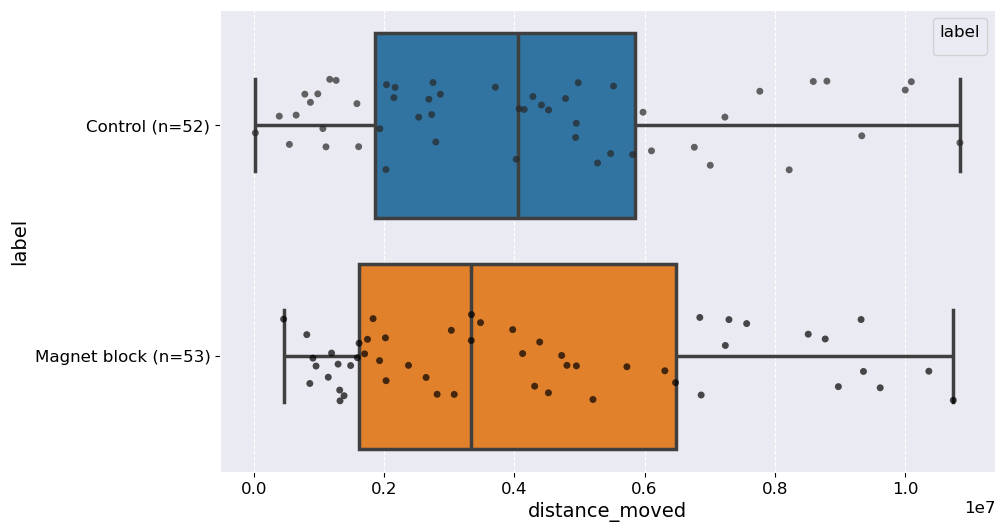

distance_moved: t-statistic = -0.07165559260343926, p-value = 0.9430149498170703, Cohen's d = -0.013988240952522702, CI = [-1176119.9309900883, 1094096.707311287]


<Figure size 1000x600 with 0 Axes>

In [31]:
from scipy.stats import ttest_ind
import statsmodels.stats.api as sms

for metric in metrics_to_plot:
    try:
        # Plot the metric
        Plot = Seaborn_Templates.sns_plot(magnet_data_summary, metric=metric, kdims="label", colorby="label", plot_type="jitterboxplot")
        plt.savefig(f"/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/MagnetBlock/241212/{metric}.png")
        
        # Perform t-test and calculate confidence interval if the metric is not in the exclusion list
        if metric not in metrics_to_exclude:
            
            # Create a DataFrame with the data for the given metric but without the NaN values for this metric
            
            data = magnet_data_summary.dropna(subset=[metric])
            
            # Extract data for the two conditions
            condition1 = data[data["label"] == "Control"][metric]
            #print(condition1)
            
            condition2 = data[data["label"] == "Magnet block"][metric]
            #print(condition2)
                       
            # Check for sufficient data points
            if len(condition1) < 2 or len(condition2) < 2:
                print(f"Not enough data for {metric}")
                continue
            
            # Check for identical values
            if condition1.var() == 0 or condition2.var() == 0:
                print(f"Identical values for {metric}")
                continue
            
            # Perform t-test
            t_stat, p_value = ttest_ind(condition1, condition2)
            
            # Calculate effect size (Cohen's d)
            cohen_d = (condition1.mean() - condition2.mean()) / (np.sqrt((condition1.var() + condition2.var()) / 2))
            
            # Calculate confidence interval for the effect size
            cm = sms.CompareMeans(sms.DescrStatsW(condition1), sms.DescrStatsW(condition2))
            ci_low, ci_high = cm.tconfint_diff(usevar='pooled')
            
            print(f"{metric}: t-statistic = {t_stat}, p-value = {p_value}, Cohen's d = {cohen_d}, CI = [{ci_low}, {ci_high}]")
        
    except Exception as e:
        print(f"Error with {metric}: {e}")

In [ ]:
# Get sample size : get how many unique fly ids we have grouped by Magnet

magnet_data.data.groupby("Magnet")["fly"].nunique()

In [ ]:
# Create a "label" column that is "Magnet block" if Magnet is y, and "Control" if Magnet is n. Add the sample size to the label.

magnet_data.data["label"] = magnet_data.data["Magnet"].apply(
    lambda x: "Magnet block (n = 53)" if x == "y" else "Control (n = 54)"
)

## Event based metric jitterboxplots

In [ ]:
Plot = HoloviewsTemplates.jitter_boxplot(
    data=magnet_data.data,
    metric="TimeToFinish",
    kdims="label",
    metadata=magnet_data.metadata,
    plot_options=HoloviewsTemplates.hv_slides,
    colorby="Magnet",
)
Plot = Plot.opts(ylabel="Time to bring the ball to the end (s)", ylim=(0, 3800))

Plot

In [ ]:
savepath = Path("/mnt/upramdya_files/DURRIEU_Matthias/Videos/240820_LabMeeting/Plots/")

In [ ]:
hv.save(Plot, savepath / "TimeToFinish_byMagnet.html")
hv.save(Plot, savepath / "TimeToFinish_byMagnet.png", fmt="png")

In [ ]:
# Filter the data to get only flies for which the Time to finish is less than the maximum time

Filtered = magnet_data.data[magnet_data.data["TimeToFinish"] < 3600]
Filtered.groupby("Magnet")["fly"].nunique()

In [ ]:

# Change the labels to inclue the updated sample size
Filtered["label"] = Filtered["Magnet"].apply(
    lambda x: "Magnet block (n = 24)" if x == "y" else "Control (n = 29)"
)

# Redo the plot

Plot = HoloviewsTemplates.jitter_boxplot(
    data=Filtered,
    metric="TimeToFinish",
    kdims="label",
    metadata=magnet_data.metadata,
    plot_options=HoloviewsTemplates.hv_slides,
    colorby="Magnet",
)

#Plot



In [ ]:
# Save this plot

savepath = Path("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/MagnetBlock/240718")

hv.save(Plot, savepath / "TimeToFinish_Filtered.html")

In [ ]:
savepath = Path("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/MagnetBlock/240718")

In [ ]:
hv.save(Plot, savepath / "TimeToFinish_byGenotype.html")

In [ ]:
# Generate the list of metrics

metrics = [
    "NumberEvents",
    "FinalEvent",
    "FinalTime",
    "SignificantEvents",
    "SignificantFirst",
    "SignificantFirstTime",
    "Pushes",
    "Pulls",
    "PullingRatio",
    "InteractionProportion",
    "AhaMoment",
    "AhaMomentIndex",
    "InsightEffect",
    "TimeToFinish",
    "SignificantRatio",
]
# For each metric, generate a jitter boxplot and save it

for metric in metrics:
    Plot = HoloviewsTemplates.jitter_boxplot(
        magnet_data.data,
        metric,
        "label",
        magnet_data.metadata,
        plot_options=HoloviewsTemplates.hv_slides,
        scale_max=[True if metric == "FinalTime" else False],
    )
    hv.save(Plot, savepath / f"{metric}.html")
    hv.save(Plot, savepath / f"{metric}.png", fmt="png")
# Make a nice layout with all the plots:
plots = []

for metric in metrics:
    Plot = HoloviewsTemplates.jitter_boxplot(
        magnet_data.data,
        metric,
        "label",
        magnet_data.metadata,
        plot_options=HoloviewsTemplates.hv_slides,
        scale_max=[True if metric in ["FinalTime", "SignificantRatio"] else False],
    )
    plots.append(Plot)

layout = hv.Layout(plots).cols(2)
hv.save(layout, savepath / "All_metrics.html")

# Also get the png
hv.save(layout, savepath / "All_metrics.png", fmt="png")

In [ ]:
savepath = Path("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/MagnetBlock/240815")

In [ ]:
metrics = [
    "NumberEvents",
    "FinalEvent",
    "FinalTime",
    "SignificantEvents",
    "SignificantFirst",
    "SignificantFirstTime",
    "Pushes",
    "Pulls",
    "PullingRatio",
    "InteractionProportion",
    "AhaMoment",
    "AhaMomentIndex",
    "InsightEffect",
    "TimeToFinish",
    "SignificantRatio",
]
# For each metric, generate a jitter boxplot and save it

for metric in metrics:
    Plot = HoloviewsTemplates.jitter_boxplot(
        Filtered,
        metric,
        "label",
        magnet_data.metadata,
        plot_options=HoloviewsTemplates.hv_slides,
        scale_max=[True if metric == "FinalTime" else False],
    )
    hv.save(Plot, savepath / f"{metric}_Filtered.html")
    hv.save(Plot, savepath / f"{metric}_Filtered.png", fmt="png")
# Make a nice layout with all the plots:
plots = []

for metric in metrics:
    Plot = HoloviewsTemplates.jitter_boxplot(
        Filtered,
        metric,
        "label",
        magnet_data.metadata,
        plot_options=HoloviewsTemplates.hv_slides,
        scale_max=[True if metric in ["FinalTime", "SignificantRatio"] else False],
    )
    plots.append(Plot)

layout = hv.Layout(plots).cols(2)
hv.save(layout, savepath / "All_metrics_Filtered.html")

# Also get the png
hv.save(layout, savepath / "All_metrics_Filtered.png", fmt="png")

## Distribution

In [ ]:
Hist = HoloviewsTemplates.histograms(
    magnet_data.data,
    "TimeToFinish",
    "label",
    bins=20,
    xlabel="Time to bring the ball to the end (s)",
    plot_options=HoloviewsTemplates.hv_slides,
    orientation="horizontal",
)
Hist
hv.save(Hist, savepath / "TimeToFinish_histogram.png")

# Ball trajectories

In [ ]:
# Make another Dataset using coordinates

Trajectories = magnet_data.generate_dataset(metrics="coordinates")

In [ ]:

# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Define the start time (in seconds)
start = 30 * 60  # 30 minutes

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Group by Magnet condition
grouped = Trajectories.groupby("Magnet")

# Initialize lists to store results
results = []

# Iterate over each group
for name, group in grouped:
    # Filter the data for the specific time point and the two minutes after
    time_point_data = group[group["time"] == start]
    two_minutes_data = group[
        (group["time"] >= start) & (group["time"] <= start + 2 * 60)
    ]

    # Calculate the velocity at the specific time point
    if not time_point_data.empty:
        velocity_at_time_point = time_point_data["yfly_relative_velocity"].values[0]
    else:
        velocity_at_time_point = None

    # Calculate the average velocity over the two minutes after the start time
    average_velocity_two_minutes = two_minutes_data["yfly_relative_velocity"].mean()

    # Store the results
    results.append(
        {
            "Magnet": name,
            "Velocity at time point": velocity_at_time_point,
            "Average velocity for two minutes": average_velocity_two_minutes,
        }
    )

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

In [ ]:
import holoviews as hv
from holoviews import opts

hv.extension("bokeh")

# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Define the start time (in seconds)
start = 30 * 60  # 30 minutes

# Define the window around the start point (e.g., 5 minutes before and after)
window = 5 * 60  # 5 minutes

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Filter the data within the window around the start point
window_data = Trajectories[
    (Trajectories["time"] >= start - window) & (Trajectories["time"] <= start + window)
]

# Group by Magnet condition and time
grouped = window_data.groupby(["Magnet", "time"])

# Calculate the average velocity for each group
average_velocity = grouped["yfly_relative_velocity"].mean().reset_index()

# Create Holoviews Curve elements for each Magnet condition
curves = []
for magnet in average_velocity["Magnet"].unique():
    magnet_data = average_velocity[average_velocity["Magnet"] == magnet]
    curve = hv.Curve(
        (magnet_data["time"], magnet_data["yfly_relative_velocity"]),
        "Time (seconds)",
        "Average Velocity",
    ).opts(
        title="Average Velocity Across Flies Grouped by Magnet Positions",
        line_width=1,  # Thinner lines
        #legend_label=f"Magnet {magnet}",
    )
    curves.append(curve)

# Overlay the curves
overlay = hv.Overlay(curves).opts(opts.Overlay(legend_position="right", show_grid=True))

# Add a vertical line for the start point
vline = hv.VLine(start).opts(
    color="red", line_dash="dashed", line_width=1, labelled=["Start Point"]
)

# Combine the overlay and the vertical line
final_plot = overlay * vline

# Display the plot
hv.output(final_plot)

In [ ]:
import pandas as pd
import holoviews as hv
from holoviews import opts

hv.extension("bokeh")

# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Define the start time (in seconds)
start = 30 * 60  # 30 minutes

# Define the window around the start point (1 minute before and after)
window = 1 * 60  # 1 minute

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Calculate the speed (absolute value of velocity)
Trajectories["yfly_relative_speed"] = Trajectories["yfly_relative_velocity"].abs()

# Filter the data for 1 minute before the start point
before_start_data = Trajectories[
    (Trajectories["time"] >= start - window) & (Trajectories["time"] < start)
]

# Filter the data for 1 minute after the start point
after_start_data = Trajectories[
    (Trajectories["time"] > start) & (Trajectories["time"] <= start + window)
]

# Group by Magnet condition and calculate the average speed for each group
average_speed_before = (
    before_start_data.groupby("Magnet")["yfly_relative_speed"].mean().reset_index()
)
average_speed_after = (
    after_start_data.groupby("Magnet")["yfly_relative_speed"].mean().reset_index()
)

# Rename the columns for clarity
average_speed_before.columns = ["Magnet", "Average Speed Before"]
average_speed_after.columns = ["Magnet", "Average Speed After"]

# Merge the results into a single DataFrame
average_speed = pd.merge(
    average_speed_before, average_speed_after, on="Magnet", how="outer"
)

# Display the result
print(average_speed)

In [ ]:
import holoviews as hv
from holoviews import opts

hv.extension("bokeh")

# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Define the start time (in seconds)
start = 30 * 60  # 30 minutes

# Define the window around the start point (e.g., 5 minutes before and after)
window = 5 * 60  # 5 minutes

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Calculate the speed (absolute value of velocity)
Trajectories["yfly_relative_speed"] = Trajectories["yfly_relative_velocity"].abs()

# Filter the data within the window around the start point
window_data = Trajectories[
    (Trajectories["time"] >= start - window) & (Trajectories["time"] <= start + window)
]

# Group by Magnet condition and time
grouped = window_data.groupby(["Magnet", "time"])

# Calculate the average speed for each group
average_speed = grouped["yfly_relative_speed"].mean().reset_index()

# Create Holoviews Curve elements for each Magnet condition
curves = []
for magnet in average_speed["Magnet"].unique():
    magnet_data = average_speed[average_speed["Magnet"] == magnet]
    curve = hv.Curve(
        (magnet_data["time"], magnet_data["yfly_relative_speed"]),
        "Time (seconds)",
        "Average Speed",
    ).opts(
        title="Average Speed Across Flies Grouped by Magnet Positions",
        line_width=1,  # Thinner lines
        # legend_label=f"Magnet {magnet}",
    ).relabel(f"Magnet {magnet}")
    curves.append(curve)

# Overlay the curves
overlay = hv.Overlay(curves).opts(opts.Overlay(legend_position="right", show_grid=True))

# Add a vertical line for the start point
vline = hv.VLine(start).opts(
    color="red", line_dash="dashed", line_width=1, labelled=["Start Point"]
)

# Combine the overlay and the vertical line
final_plot = overlay * vline

# Display the plot
hv.output(final_plot)

In [ ]:
# 1 pixel = 0.06 mm . Make a Velocity as mm/s plot

# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Define the start time (in seconds)
start = 30 * 60  # 30 minutes

# Define the window around the start point (e.g., 5 minutes before and after)
window = 5 * 60  # 5 minutes

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Calculate the speed (absolute value of velocity)

Trajectories["yfly_relative_speed"] = Trajectories["yfly_relative_velocity"].abs()

# Convert the speed to mm/s

Trajectories["yfly_relative_speed_mm_s"] = Trajectories["yfly_relative_speed"] * 0.06

# Filter the data within the window around the start point

window_data = Trajectories[
    (Trajectories["time"] >= start - window) & (Trajectories["time"] <= start + window)
]

# Group by Magnet condition and time

grouped = window_data.groupby(["Magnet", "time"])

# Calculate the average speed for each group

average_speed = grouped["yfly_relative_speed_mm_s"].mean().reset_index()

# Create Holoviews Curve elements for each Magnet condition

curves = []

for magnet in average_speed["Magnet"].unique():
    magnet_data = average_speed[average_speed["Magnet"] == magnet]
    curve = (
        hv.Curve(
            (magnet_data["time"], magnet_data["yfly_relative_speed_mm_s"]),
            "Time (seconds)",
            "Average Speed (mm/s)",
        )
        .opts(
            title="Average Speed Across Flies Grouped by Magnet Positions",
            line_width=1,  # Thinner lines
        )
        .relabel(f"Magnet {magnet}")
    )
    curves.append(curve)

# Overlay the curves

overlay = hv.Overlay(curves).opts(opts.Overlay(legend_position="right", show_grid=True))

# Add a vertical line for the start point

vline = hv.VLine(start).opts(
    color="red", line_dash="dashed", line_width=1, labelled=["Start Point"]
)

# Combine the overlay and the vertical line

final_plot = overlay * vline

# Display the plot

hv.output(final_plot)

In [ ]:
# Define the start time (in seconds)
start = 30 * 60  # 30 minutes

# Define the window around the start point (e.g., 5 minutes before and after)
window = 5 * 60  # 5 minutes

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Calculate the speed (absolute value of velocity)
Trajectories["yfly_relative_speed"] = Trajectories["yfly_relative_velocity"].abs()

# Convert the speed to mm/s
Trajectories["yfly_relative_speed_mm_s"] = Trajectories["yfly_relative_speed"] * 0.06

# Apply a rolling window average for smoothing (e.g., window size of 5)
Trajectories["yfly_relative_speed_mm_s_smooth"] = Trajectories.groupby("Magnet")[
    "yfly_relative_speed_mm_s"
].transform(lambda x: x.rolling(window=150, min_periods=1).mean())

# Filter the data within the window around the start point
window_data = Trajectories[
    (Trajectories["time"] >= start - window) & (Trajectories["time"] <= start + window)
]

# Group by Magnet condition and time
grouped = window_data.groupby(["Magnet", "time"])

# Calculate the average speed for each group
average_speed = grouped["yfly_relative_speed_mm_s_smooth"].mean().reset_index()

# Create Holoviews Curve elements for each Magnet condition
curves = []

for magnet in average_speed["Magnet"].unique():
    magnet_data = average_speed[average_speed["Magnet"] == magnet]
    curve = (
        hv.Curve(
            (magnet_data["time"], magnet_data["yfly_relative_speed_mm_s_smooth"]),
            "Time (seconds)",
            "Average Speed (mm/s)",
        )
        .opts(
            title="Average Speed Across Flies Grouped by Magnet Positions",
            line_width=3,  # Thinner lines
            ylabel="Average Speed (mm/s)",
        )
        .relabel(f"Magnet {magnet}")
    )  # Use relabel to set the legend label
    curves.append(curve)

# Overlay the curves
overlay = hv.Overlay(curves).opts(opts.Overlay(legend_position="right", show_grid=True))

# Add a vertical line for the start point
vline = hv.VLine(start).opts(
    color="red", line_dash="dashed", line_width=1, labelled=["Start Point"]
)

# Combine the overlay and the vertical line
final_plot = (overlay * vline).options(**HoloviewsTemplates.hv_slides["plot"]).opts(invert_axes=False)

# Display the plot
hv.output(final_plot)

In [ ]:
# Group by Magnet condition and count the number of unique flies
sample_size = window_data.groupby("Magnet")["fly"].nunique().reset_index()
sample_size.columns = ["Magnet", "sample_size"]

print(sample_size)

In [ ]:
# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Define the start time (in seconds)
start = 60 * 60  # 60 minutes

# Define the window around the start point (e.g., 5 minutes before and after)
window = 10 * 60  # 5 minutes

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Calculate the speed (absolute value of velocity)
Trajectories["yfly_relative_speed"] = Trajectories["yfly_relative_velocity"].abs()

# Convert the speed to mm/s
Trajectories["yfly_relative_speed_mm_s"] = Trajectories["yfly_relative_speed"] * 0.06

# Apply a rolling window average for smoothing (e.g., window size of 5)
Trajectories["yfly_relative_speed_mm_s_smooth"] = Trajectories.groupby("Magnet")[
    "yfly_relative_speed_mm_s"
].transform(lambda x: x.rolling(window=150, min_periods=1).mean())

# Filter the data within the window around the start point
window_data = Trajectories[
    (Trajectories["time"] >= start - window) & (Trajectories["time"] <= start + window)
]

# Group by Magnet condition and time
grouped = window_data.groupby(["Magnet", "time"])

# Calculate the average speed and SEM for each group
average_speed = (
    grouped["yfly_relative_speed_mm_s_smooth"].agg(["mean", "sem"]).reset_index()
)

# Compute sample size based on the number of unique flies per Magnet condition
sample_size = window_data.groupby("Magnet")["fly"].nunique().reset_index()
sample_size.columns = ["Magnet", "sample_size"]

# Merge the sample size with the average_speed DataFrame
average_speed = pd.merge(average_speed, sample_size, on="Magnet")

# Generate a label column with the Magnet and sample size information
average_speed["label"] = average_speed.apply(
    lambda row: (
        f"Magnet block (n = {row['sample_size']})"
        if row["Magnet"] == "y"
        else f"Control (n = {row['sample_size']})"
    ),
    axis=1,
)

# Create Holoviews Curve and Area elements for each Magnet condition
curves = []
areas = []

for label in average_speed["label"].unique():
    label_data = average_speed[average_speed["label"] == label]
    time = label_data["time"]
    mean_speed = label_data["mean"]
    sem_speed = label_data["sem"]

    # Calculate the upper and lower bounds of the confidence interval
    lower_bound = mean_speed - sem_speed
    upper_bound = mean_speed + sem_speed

    # Create the curve for the mean speed
    curve = (
        hv.Curve(
            (time, mean_speed),
            "Time (seconds)",
            "Average Speed (mm/s)",
        )
        .opts(
            title="Average Speed Across Flies Grouped by Magnet Positions",
            line_width=3,
            ylabel="Average Speed (mm/s)",
        )
        .relabel(label)  # Use the label for the legend
    )
    curves.append(curve)

    # Create the area for the confidence interval
    area = hv.Area((time, lower_bound, upper_bound), vdims=["lower", "upper"]).opts(
        alpha=0.3,
    )
    areas.append(area)

# Overlay the curves and confidence intervals
overlay = hv.Overlay(areas + curves).opts(
    opts.Overlay(legend_position="right", show_grid=True)
)

# Add a vertical line for the start point
vline = hv.VLine(start).opts(
    color="red", line_dash="dashed", line_width=3, labelled=["Start Point"]
)

# Combine the overlay and the vertical line
final_plot = (
    (overlay * vline)
    .options(**HoloviewsTemplates.hv_slides["plot"])
    .opts(invert_axes=False, show_legend=True, width = 2000)
)

# Display the plot
hv.output(final_plot)

In [ ]:
# Save this plot

savepath = Path("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/MagnetBlock/240718")

hv.save(final_plot, savepath / "AverageSpeed.html")
hv.save(final_plot, savepath / "AverageSpeed.png", fmt="png")

In [ ]:
import pandas as pd
import holoviews as hv
from holoviews import opts
import numpy as np

hv.extension("bokeh")

# Assuming Trajectories is a DataFrame with columns 'time', 'yfly_relative', and 'Magnet'

# Calculate yfly_relative velocity
Trajectories["yfly_relative_velocity"] = (
    Trajectories["yfly_relative"].diff() / Trajectories["time"].diff()
)

# Calculate the speed (absolute value of velocity)
Trajectories["yfly_relative_speed"] = Trajectories["yfly_relative_velocity"].abs()

# Convert the speed to mm/s
Trajectories["yfly_relative_speed_mm_s"] = Trajectories["yfly_relative_speed"] * 0.06

# Apply a rolling window average for smoothing (e.g., window size of 5)
Trajectories["yfly_relative_speed_mm_s_smooth"] = Trajectories.groupby("Magnet")[
    "yfly_relative_speed_mm_s"
].transform(lambda x: x.rolling(window=(500), min_periods=1).mean())

# Group by Magnet condition and time
grouped = Trajectories.groupby(["Magnet", "time"])

# Calculate the average speed and SEM for each group
average_speed = (
    grouped["yfly_relative_speed_mm_s_smooth"].agg(["mean", "sem"]).reset_index()
)

# Compute sample size based on the number of unique flies per Magnet condition
sample_size = window_data.groupby("Magnet")["fly"].nunique().reset_index()
sample_size.columns = ["Magnet", "sample_size"]

# Merge the sample size with the average_speed DataFrame
average_speed = pd.merge(average_speed, sample_size, on="Magnet")

# Generate a label column with the Magnet and sample size information
average_speed["label"] = average_speed.apply(
    lambda row: (
        f"Magnet block (n = {row['sample_size']})"
        if row["Magnet"] == "y"
        else f"Control (n = {row['sample_size']})"
    ),
    axis=1,
)

# Create Holoviews Curve and Area elements for each Magnet condition
curves = []
areas = []

for magnet in average_speed["label"].unique():
    magnet_data = average_speed[average_speed["label"] == magnet]
    time = magnet_data["time"]
    mean_speed = magnet_data["mean"]
    sem_speed = magnet_data["sem"]

    # Calculate the upper and lower bounds of the confidence interval
    lower_bound = mean_speed - sem_speed
    upper_bound = mean_speed + sem_speed

    # Create the curve for the mean speed
    curve = (
        hv.Curve(
            (time, mean_speed),
            "Time (seconds)",
            "Average Speed (mm/s)",
        )
        .opts(
            title="Average Speed Across Flies Grouped by Magnet Positions",
            line_width=3,
            ylabel="Average Speed (mm/s)",
        )
        .relabel(f"Magnet {magnet}")
    )
    curves.append(curve)

    # Create the area for the confidence interval
    area = hv.Area((time, lower_bound, upper_bound), vdims=["lower", "upper"]).opts(
        alpha=0.3,
    )
    areas.append(area)

In [ ]:

# Overlay the curves and confidence intervals
overlay = hv.Overlay(curves).opts(
    opts.Overlay(show_grid=True)
).options(**HoloviewsTemplates.hv_slides["plot"]).opts(invert_axes=False, show_legend=True)

# Display the plot
hv.output(overlay)

In [ ]:
hv.save(overlay, savepath / "AverageSpeed_Full.html")
hv.save(overlay, savepath / "AverageSpeed_Full.png", fmt="png")